# Ridge Regression

## 1. Overview

Ridge Regression, also known as Tikhonov regularization, is a method of estimating the coefficients of multiple-regression models in scenarios where independent variables are highly correlated. It introduces a penalty term to the regression model which shrinks the coefficients towards zero, but not exactly zero. This helps in reducing model complexity and preventing over-fitting, which may result from simple linear regression.

The formula for Ridge Regression is:

\[ \text{minimize} \left( \sum_{i=1}^n (y_i - \sum_{j=1}^p x_{ij} \beta_j)^2 + \lambda \sum_{j=1}^p \beta_j^2 \right) \]

Here, \(\lambda\) is a tuning parameter that balances the fit of the model with respect to the size of the coefficients. The larger the value of \(\lambda\), the more the shrinkage of the coefficients.

## Explanation in Layman's Terms

Imagine you're a chef making a stew with many ingredients (variables). If you put too much of any ingredient, especially the strong ones, the stew might become overpowering or lose its nuanced flavors. In cooking, you want a balanced mix where no single flavor dominates.

Ridge Regression acts like a wise chef who understands how to balance flavors. It's aware that while each ingredient adds its own unique taste, putting too much of one thing can ruin the stew. So, it carefully adjusts the amount of each ingredient. The strong flavors (variables with larger coefficients) are toned down so that they don't overpower the dish, but they're still there, just in a more balanced way.

This is like Ridge Regression's penalty term, which shrinks the coefficients (ingredients) towards zero (a more balanced state) but doesn’t completely eliminate any of them, ensuring that each variable still contributes to the final outcome in a more harmonious way.


https://www.youtube.com/watch?v=Q81RR3yKn30

## 2. History of Ridge Regression

1. **Development and History**: Introduced in the 1960s by Andrei Tikhonov in the context of solving ill-posed problems. It gained prominence in the statistics community in the 1970s when it was independently rediscovered and popularized by Arthur E. Hoerl and Robert W. Kennard. Ridge Regression was developed as a solution to the multicollinearity problem in linear regression.

2. **Name Origin**: The name "Ridge Regression" is derived from the method's introduction of a bias into the regression estimates through a ridge-like constraint applied to the coefficients, effectively creating a ridge in the cost function that the solution must "climb over."


This sentence is discussing a specific problem in statistical modeling, particularly in the context of linear regression, known as multicollinearity. Let's break it down:

Multicollinearity: This occurs when two or more predictor variables in a multiple regression model are highly correlated. In other words, one predictor variable can be linearly predicted from the others with a substantial degree of accuracy.

Least Squares Estimates are Unbiased: In the context of linear regression, "least squares" refers to the method used to find the best-fitting line through the data. An "unbiased" estimate means that, on average, the method correctly estimates the true value of the parameter it's trying to predict. So, even in the presence of multicollinearity, the average of the estimates from the least squares method will be correct.

Variances are Large: Variance refers to the spread of a set of data points. In this context, a large variance of an estimate means that the individual estimates from different samples can vary widely. This can happen even if the average (mean) of these estimates is accurate (unbiased). When there's multicollinearity, the least squares estimates can change erratically in response to small changes in the model or the data. This makes the estimates very sensitive and unstable.

Far from the True Value: Despite the unbiased nature of the estimates on average, the individual estimates can be far from the true parameter value due to their high variance. This means that any particular estimate might be significantly off, even though the method is generally accurate across many different samples.

In summary, when multicollinearity is present in a regression model, the method used to estimate the relationships between variables (least squares) is still unbiased on average. However, the specific estimates it produces in any given situation can be highly unreliable, varying greatly from one sample to another. This makes it difficult to trust any single estimate, as it might be significantly different from the actual underlying value it's trying to predict.

## 3. Sample Code

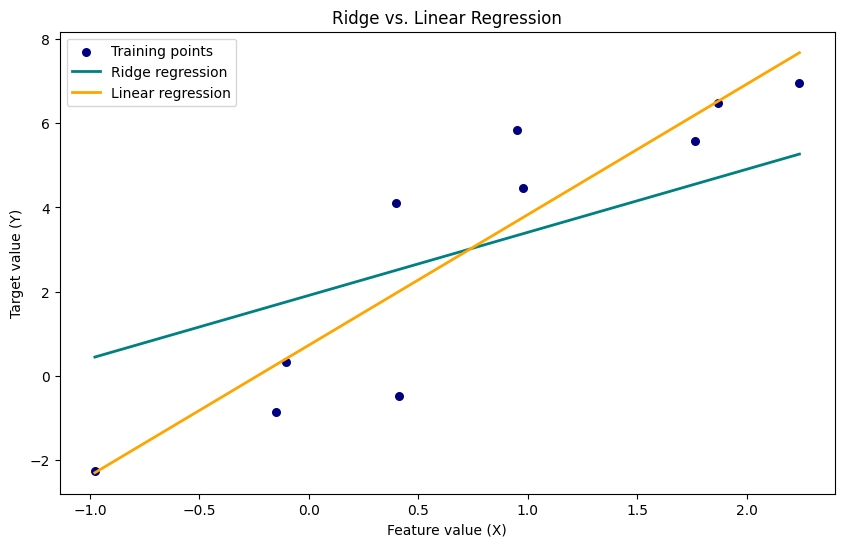

(1.4980792092829762, 3.0998880332235745)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge, LinearRegression

# Create some data points
np.random.seed(0)
n_samples, n_features = 10, 1
X = np.random.randn(n_samples, n_features)
y = 3 * X.ravel() + np.random.randn(n_samples) * 2

# Fit both Ridge and Linear Regression
ridge = Ridge(alpha=10)
ridge.fit(X, y)

linear = LinearRegression()
linear.fit(X, y)

# Generate points for prediction line
x_plot = np.linspace(X.min(), X.max(), 100)
ridge_line = ridge.predict(x_plot[:, None])
linear_line = linear.predict(x_plot[:, None])

# Plotting the data points
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='navy', s=30, marker='o', label="Training points")

# Plotting the prediction lines
plt.plot(x_plot, ridge_line, color='teal', linewidth=2, label='Ridge regression')
plt.plot(x_plot, linear_line, color='orange', linewidth=2, label='Linear regression')

# Labels and legend
plt.xlabel('Feature value (X)')
plt.ylabel('Target value (Y)')
plt.title('Ridge vs. Linear Regression')
plt.legend()

plt.show()

# Return the coefficients for interpretation
(ridge.coef_[0], linear.coef_[0])


The diagram displays both Ridge Regression (in teal) and Linear Regression (in orange) fitted to the same training data (navy dots). Both models attempt to draw a line that best fits the data points.

Linear Regression aims to minimize the sum of squared residuals (the differences between the observed and predicted values). As you can see, the orange line passes close to the data points, and in this simple scenario, it fits the data well.

Ridge Regression, on the other hand, adds a penalty term to the loss function: the sum of the squares of the coefficients (also known as L2 penalty). This discourages the model from fitting the noise in the data and, as a result, reduces model complexity. Because of this penalty, the teal line does not follow the data points as closely as the orange line does. This can be beneficial when dealing with real-world data, which often has a lot of noise, or when dealing with situations where preventing overfitting to the training set is important.

In the diagram, the Ridge Regression line is slightly less steep than the Linear Regression line, indicated by the smaller coefficient (1.498 for Ridge vs. 3.100 for Linear). This is due to the Ridge regression's penalty term shrinking the coefficients towards zero.

In summary, Ridge Regression is used over Linear Regression when we need to regularize the model to prevent overfitting. This regularization can help with problems such as multicollinearity (where independent variables are highly correlated), model complexity in the presence of a large number of features, and when the data includes noise that the model should not learn from.

## 4. Usecases in Finance

- **Stock Price Prediction:** Predicting stock prices by regularizing the model to handle multicollinearity in features such as historical prices, volumes, and market indicators.

- **Credit Risk Modeling:** Estimating the probability of default by incorporating multiple borrower attributes while preventing overfitting.

- **Portfolio Optimization:** Predicting asset returns for portfolio construction while controlling for feature multicollinearity.

- **Loan Default Prediction:** Modeling the likelihood of loan default using a wide range of correlated borrower and economic variables.

- **Expense Forecasting:** Predicting future operational or customer expenses by regularizing models to improve generalization.

- **Risk Assessment:** Modeling financial risk factors (e.g., credit risk, market risk) when features are highly correlated.

- **Macro-Economic Modeling:** Predicting GDP growth, inflation rates, or interest rates using multiple economic indicators prone to multicollinearity.

- **Marketing ROI Prediction:** Estimating the return on investment of marketing campaigns by accounting for multiple correlated input variables.

- **Revenue Forecasting:** Predicting company revenue trends while handling correlations between input features like market trends, seasonal effects, and pricing data.

- **Insurance Pricing Models:** Estimating insurance premiums while accounting for correlated risk factors to avoid overfitting.
